# The latimes theme for Altair.

Make charts the Los Angeles Times way using Python's Altair charting library.

In [1]:
import altair as alt

Import and enable the theme.

In [2]:
import altair_latimes as lat

In [3]:
alt.themes.register('latimes', lat.theme)

<function altair_latimes.theme()>

In [4]:
alt.themes.enable('latimes')

ThemeRegistry.enable('latimes')

Make some example charts

In [5]:
import numpy as np
import pandas as pd
from vega_datasets import data

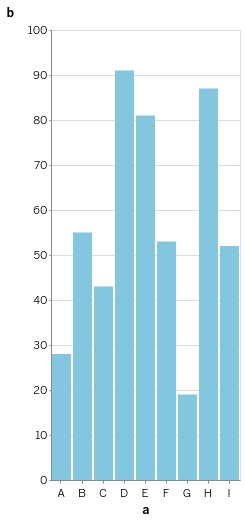

In [6]:
source = pd.DataFrame({
    'a': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'b': [28, 55, 43, 91, 81, 53, 19, 87, 52]
})

alt.Chart(source).mark_bar().encode(
    x='a',
    y='b'
)

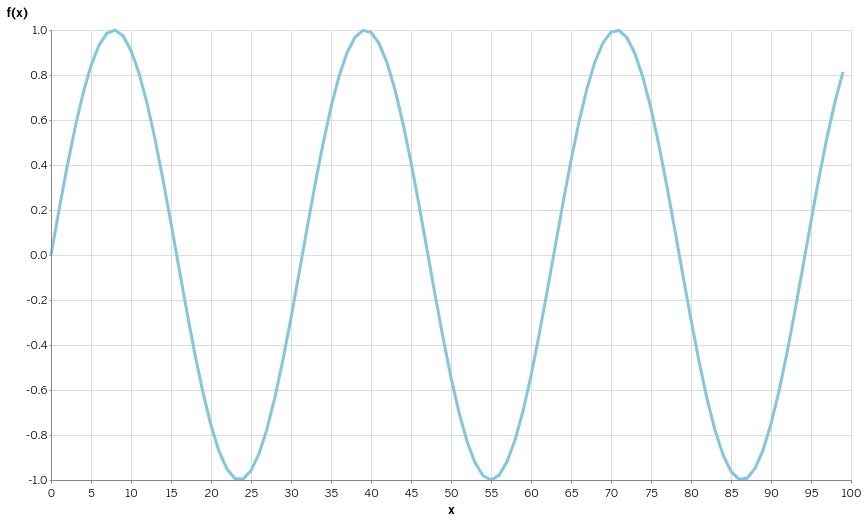

In [7]:
x = np.arange(100)
source = pd.DataFrame({
  'x': x,
  'f(x)': np.sin(x / 5)}
)

alt.Chart(source).mark_line().encode(
    x='x',
    y='f(x)'
)

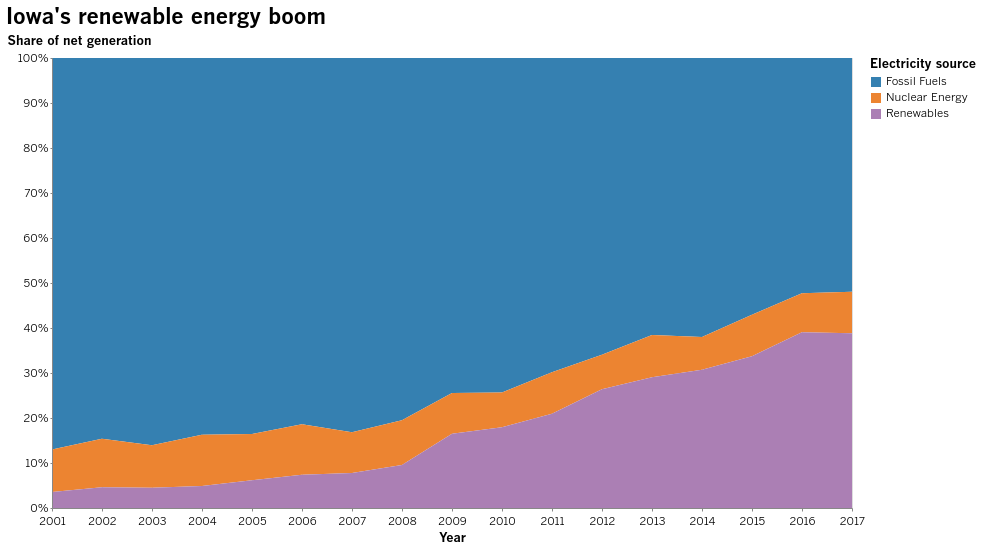

In [8]:
source = data.iowa_electricity()

alt.Chart(source, title="Iowa's renewable energy boom").mark_area().encode(
    x=alt.X(
        "year:T",
        title="Year"
    ),
    y=alt.Y(
        "net_generation:Q",
        stack="normalize",
        title="Share of net generation",
        axis=alt.Axis(format=".0%"),
    ),
    color=alt.Color(
        "source:N",
        legend=alt.Legend(title="Electricity source"),
    )
)

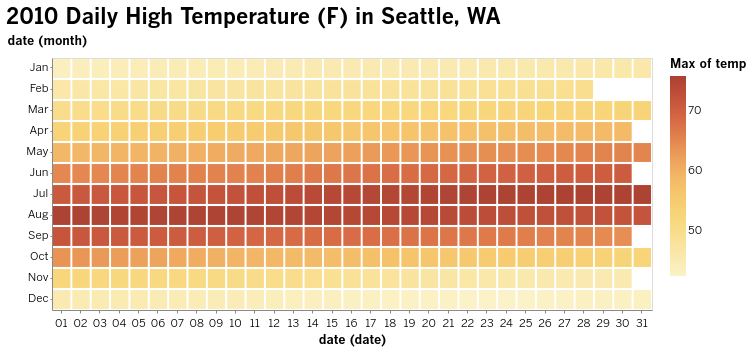

In [9]:
source = data.seattle_temps.url

alt.Chart(
    source,
    title="2010 Daily High Temperature (F) in Seattle, WA"
).mark_rect().encode(
    x=alt.X('date:O', timeUnit='date'),
    y=alt.Y('date:O', timeUnit='month'),
    color=alt.Color('temp:Q', aggregate='max'),
    tooltip=[
        alt.Tooltip('date:T', timeUnit='monthdate', title='Date'),
        alt.Tooltip('temp:Q', aggregate='max', title='Max Temp')
    ]
).properties(width=600)

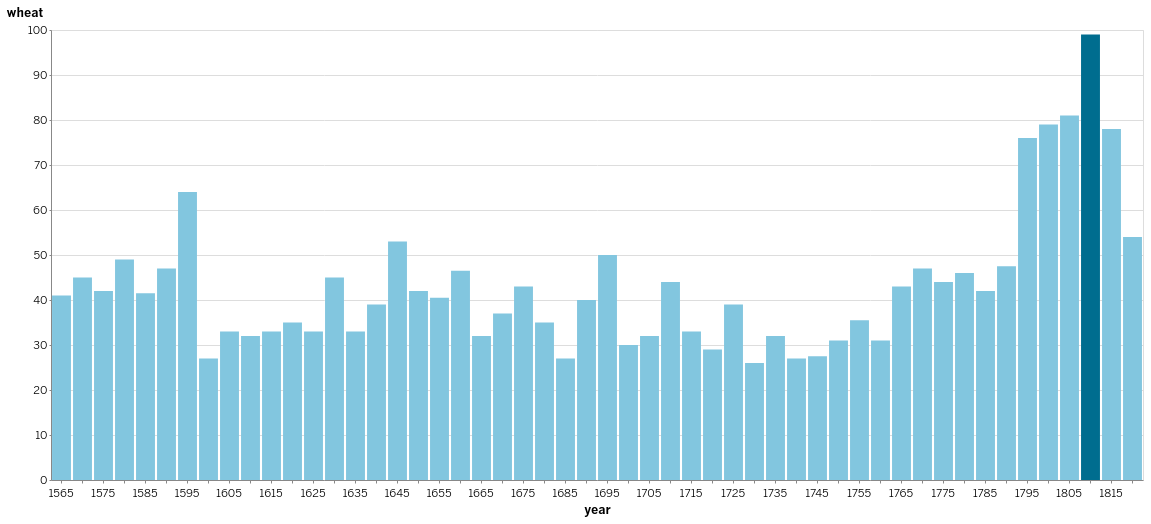

In [10]:
source = data.wheat()

alt.Chart(source).mark_bar().encode(
    x='year:O',
    y="wheat:Q",
    # The highlight will be set on the result of a conditional statement
    color=alt.condition(
        alt.datum.year == 1810,  # If the year is 1810 this test returns True,
        alt.value(lat.palette['accent']),     # which sets the bar orange.
        alt.value(lat.palette['default'])   # And if it's not true it sets the bar steelblue.
    )
)

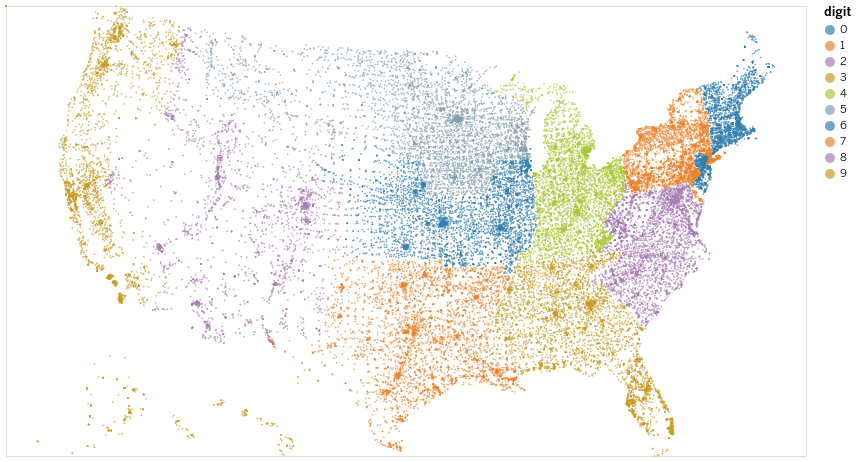

In [11]:
source = data.zipcodes.url

alt.Chart(source).mark_circle(size=3).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='digit:N'
).project(
    type='albersUsa'
).transform_calculate(
    "digit", alt.expr.substring(alt.datum.zip_code, 0, 1)
)

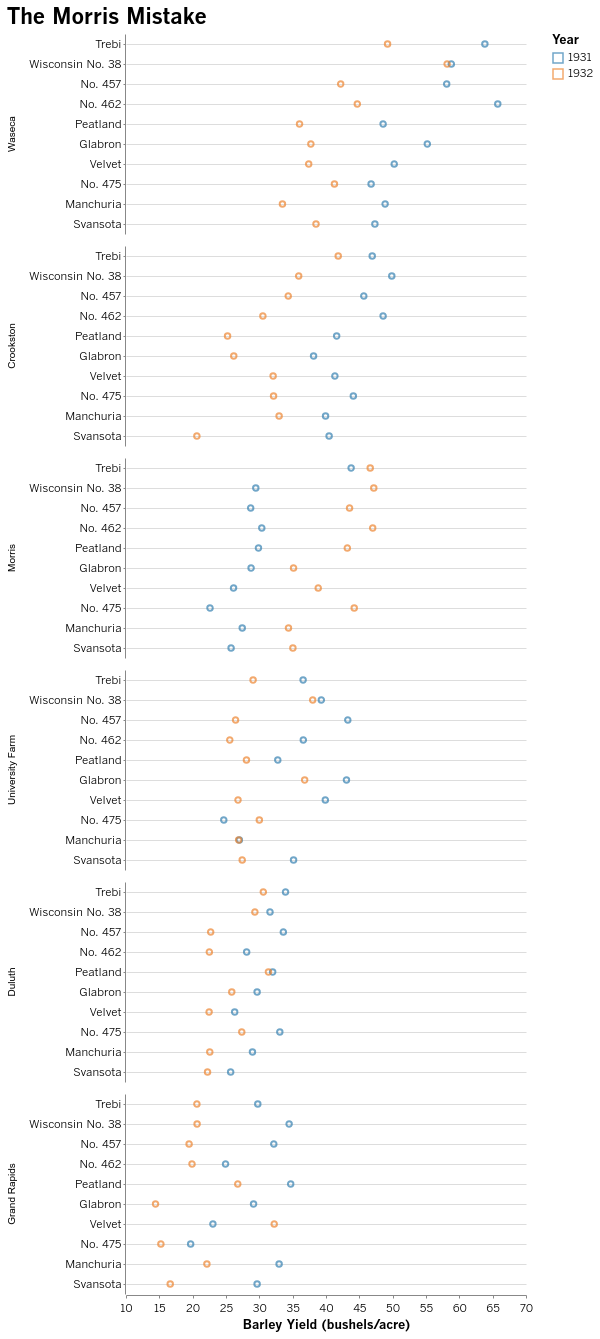

In [12]:
source = data.barley()

alt.Chart(source, title="The Morris Mistake").mark_point().encode(
    alt.X(
        'yield:Q',
        title="Barley Yield (bushels/acre)",
        scale=alt.Scale(zero=False),
        axis=alt.Axis(grid=False)
    ),
    alt.Y(
        'variety:N',
        title="",
        sort=alt.EncodingSortField(field='yield', op='sum', order='descending'),
        scale=alt.Scale(rangeStep=20),
        axis=alt.Axis(grid=True)
    ),
    color=alt.Color('year:N', legend=alt.Legend(title="Year")),
    row=alt.Row(
        'site:N',
        title="",
        sort=alt.EncodingSortField(field='yield', op='sum', order='descending'),
    )
).configure_view(stroke="transparent", width=400, height=300)